In [1]:
'''
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29
'''

'\nThe dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. \nThe Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.\n\nProblem statement: predicting turbine energy yield (TEY) using ambient variables as features.\n\nAttribute Information:\n\nThe explanations of sensor measurements and their brief statistics are given below.\n\nVariable (Abbr.) Unit Min Max Mean\nAmbient temperature (AT) C â€“6.23 37.10 17.71\nAmbient pressure (AP) mbar 985.85 1036.56 1013.07\nAmbient humidity (AH) (%) 24.08 100.20 77.87\nAir filter difference pressure (AFDP) mbar 2.09 7.61 3.93\nGas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56\nTurbine inlet temperature (TIT) C 1000.85 1100.89 1081.43\nTurbine after temperature (TAT) C 511.04 550.61 546.16\nCompressor discharge pressure (CDP) mbar 9.85 15.16 12.06\nTurbine energy yield (T

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasRegressor

In [4]:
#pip install scikeras

In [5]:
data=pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
data.shape

(15039, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'AP'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'AFDP'}>,
        <Axes: title={'center': 'GTEP'}>,
        <Axes: title={'center': 'TIT'}>],
       [<Axes: title={'center': 'TAT'}>, <Axes: title={'center': 'TEY'}>,
        <Axes: title={'center': 'CDP'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'NOX'}>,
        <Axes: >]], dtype=object)

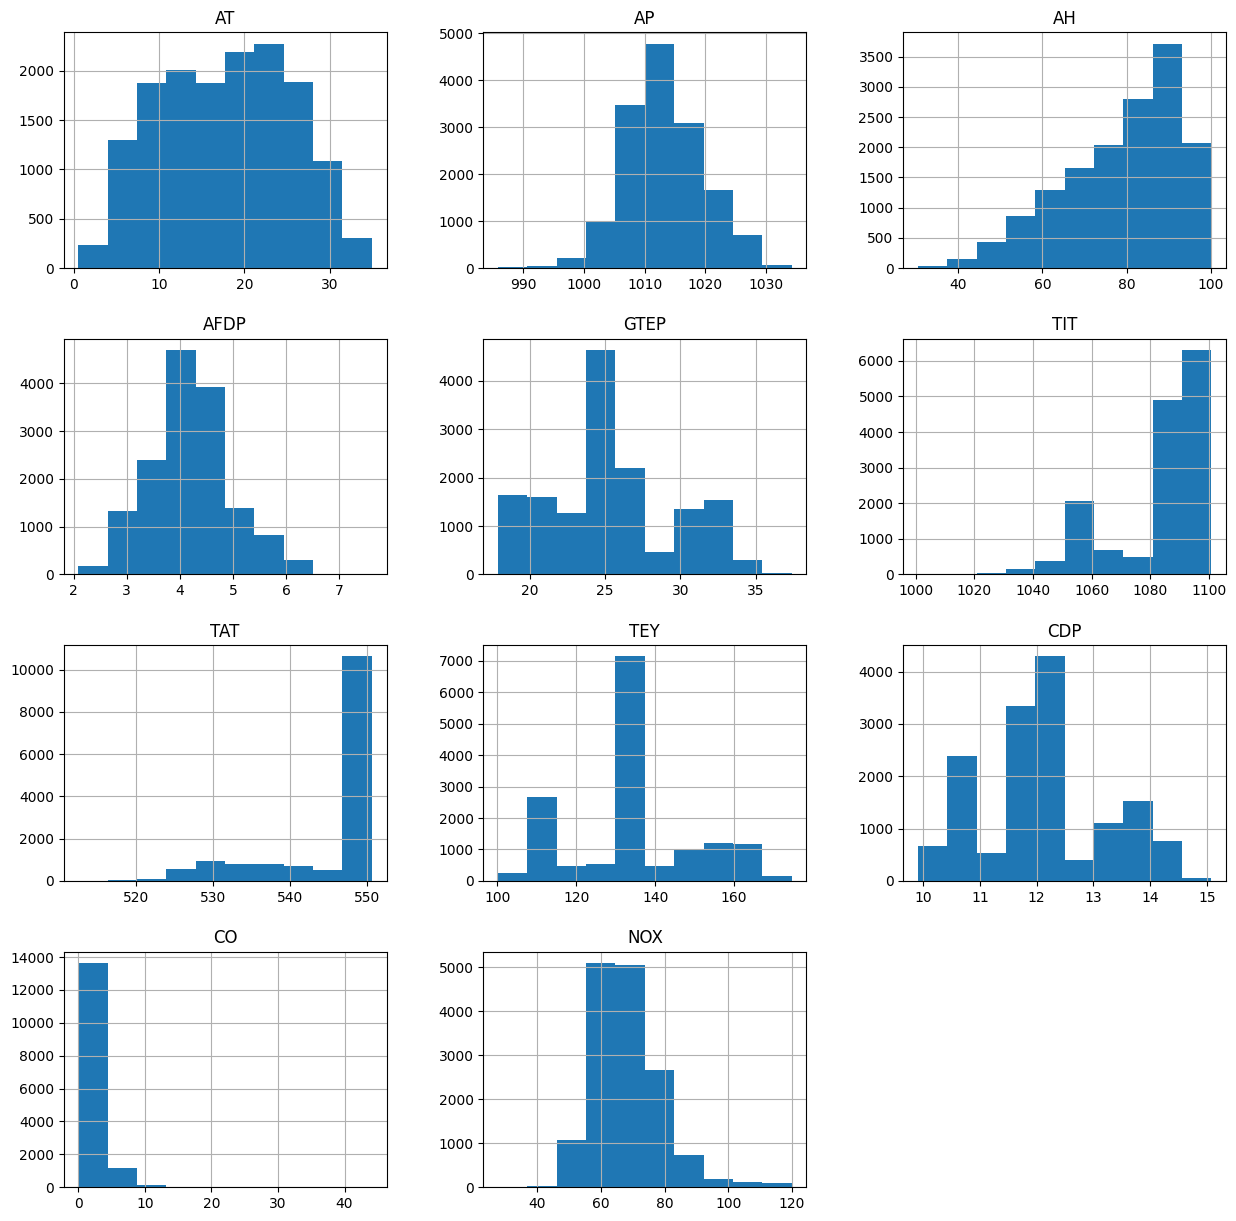

In [8]:
data.hist(figsize=(15,15), bins=10)

In [9]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [10]:
#Missing Values

data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [12]:
data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [13]:
#Duplicate Values

data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [14]:
data[data.duplicated()].shape

(0, 11)

In [15]:
corr=data.corr()
corr

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


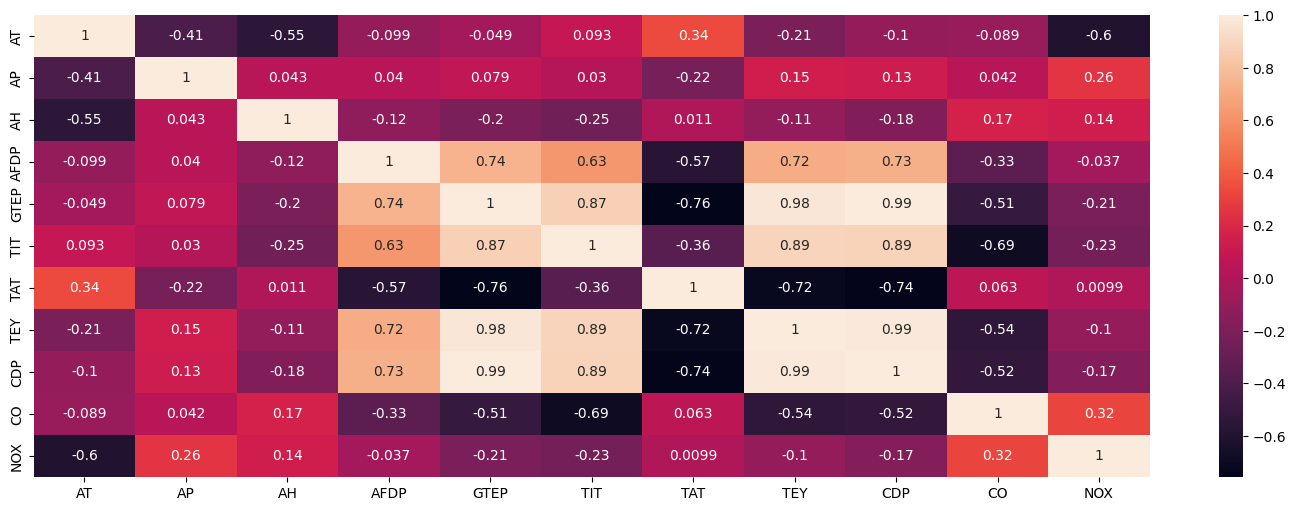

In [16]:
plt.figure(figsize=(18,6))
sns.heatmap(corr, annot=True);

In [17]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [18]:
# train and test split

In [19]:
x = data.drop(labels='TEY',axis=1)
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [20]:
y = data[['TEY']]
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [21]:
#Standardization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_data = scaler.fit_transform(x)
scale_data

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12)

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10527, 10), (10527, 1), (4512, 10), (4512, 1))

**Model**

Tuning of Hyperparameters :- Batch Size and Epochs

In [25]:
def regression_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

In [26]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator= model, param_grid=param_grid, cv=KFold() ,verbose=5)
gsv_result= gsv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17983.834 total time=  23.3s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17884.643 total time=   7.6s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17947.230 total time=  11.5s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18139.010 total time=   6.9s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18041.307 total time=  11.9s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17983.834 total time=  11.9s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17884.643 total time=  12.2s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17947.230 total time=  11.4s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18139.010 total time=   9.6s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18041.297 total time=   7.2s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=-17983

In [27]:
# Summarize the results
print('Best : {}, using {}'.format(gsv_result.best_score_,gsv_result.best_params_))
means = gsv_result.cv_results_['mean_test_score']
stds = gsv_result.cv_results_['std_test_score']
params = gsv_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -17999.202734375, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
-17999.2046875,86.46396840320972 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-17999.221875,86.43766161811817 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}


**Tuning of Hyperparameters**:- Learning rate and Drop out rate

In [28]:
def regression_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

In [29]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator= model, param_grid=param_grid, cv=KFold() ,verbose=5)
gsv_result_a=gsv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17983.834 total time=  12.5s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17884.643 total time=   8.4s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17947.230 total time=  11.5s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18139.010 total time=  11.4s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18041.297 total time=   6.7s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17983.834 total time=  11.8s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17884.643 total time=  11.4s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17947.230 total time=   7.6s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18139.010 total time=  11.4s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18041.297 total time=  11.4s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=-17983

In [30]:
# Summarize the results
print('Best : {}, using {}'.format(gsv_result_a.best_score_,gsv_result_a.best_params_))
means = gsv_result_a.cv_results_['mean_test_score']
stds = gsv_result_a.cv_results_['std_test_score']
params = gsv_result_a.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -17999.202734375, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-17999.202734375,86.4630174498649 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}


**Tuning of Hyperparameter** :Activation Function & Kernel Initializer

In [31]:
def regression_model(activation_function,inti):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=0.1)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

In [32]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
activation_function = ['relu', 'tanh','softmax','linear']
inti = ['uniform', 'zero','normal']
param_grid = dict(activation_function = activation_function,inti = inti)
gsv_m = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose = 5)
gsv_result_b= gsv_m.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation_function=relu, inti=uniform;, score=-17983.834 total time=  11.4s
[CV 2/5] END activation_function=relu, inti=uniform;, score=-17884.643 total time=  11.4s
[CV 3/5] END activation_function=relu, inti=uniform;, score=-17947.230 total time=  11.4s
[CV 4/5] END activation_function=relu, inti=uniform;, score=-18139.010 total time=   6.4s
[CV 5/5] END activation_function=relu, inti=uniform;, score=-18041.297 total time=   7.3s
[CV 1/5] END activation_function=relu, inti=zero;, score=-17983.834 total time=  11.3s
[CV 2/5] END activation_function=relu, inti=zero;, score=-17884.643 total time=   6.3s
[CV 3/5] END activation_function=relu, inti=zero;, score=-17947.230 total time=   7.1s
[CV 4/5] END activation_function=relu, inti=zero;, score=-18139.010 total time=   6.8s
[CV 5/5] END activation_function=relu, inti=zero;, score=-18041.297 total time=  11.8s
[CV 1/5] END activation_function=relu, inti=normal;, s

In [33]:
# Summarize the results
print('Best : {}, using {}'.format(gsv_result_b.best_score_,gsv_result_b.best_params_))
means = gsv_result_b.cv_results_['mean_test_score']
stds = gsv_result_b.cv_results_['std_test_score']
params = gsv_result_b.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -17999.202734375, using {'activation_function': 'relu', 'inti': 'uniform'}
-17999.202734375,86.4630174498649 with: {'activation_function': 'relu', 'inti': 'uniform'}
-17999.202734375,86.4630174498649 with: {'activation_function': 'relu', 'inti': 'zero'}
-17999.202734375,86.4630174498649 with: {'activation_function': 'relu', 'inti': 'normal'}
-17999.205078125,86.45991214300348 with: {'activation_function': 'tanh', 'inti': 'uniform'}
-17999.205078125,86.45991214300348 with: {'activation_function': 'tanh', 'inti': 'zero'}
-17999.202734375,86.4630174498649 with: {'activation_function': 'tanh', 'inti': 'normal'}
-17999.202734375,86.4630174498649 with: {'activation_function': 'softmax', 'inti': 'uniform'}
-17999.202734375,86.4630174498649 with: {'activation_function': 'softmax', 'inti': 'zero'}
-17999.202734375,86.4630174498649 with: {'activation_function': 'softmax', 'inti': 'normal'}
-17999.202734375,86.4630174498649 with: {'activation_function': 'linear', 'inti': 'uniform'}
-17999.

Number of Neurons in hidden layer

In [34]:
def regression_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(8,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation= 'sigmoid'))
    adam = Adam(learning_rate= 0.1)
    model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae','mse'])
    return model

In [35]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
neuron1 = [16,12,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2 = neuron2)
gsvp = GridSearchCV(estimator = model,param_grid = param_grid,cv=KFold(),verbose=5)
gsv_result_c= gsvp.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......neuron1=16, neuron2=12;, score=-17983.834 total time=   6.6s
[CV 2/5] END .......neuron1=16, neuron2=12;, score=-17884.643 total time=   7.2s
[CV 3/5] END .......neuron1=16, neuron2=12;, score=-17947.230 total time=  11.4s
[CV 4/5] END .......neuron1=16, neuron2=12;, score=-18139.010 total time=  11.3s
[CV 5/5] END .......neuron1=16, neuron2=12;, score=-18041.297 total time=   6.4s
[CV 1/5] END ........neuron1=16, neuron2=8;, score=-17983.834 total time=  11.7s
[CV 2/5] END ........neuron1=16, neuron2=8;, score=-17884.643 total time=  11.4s
[CV 3/5] END ........neuron1=16, neuron2=8;, score=-17947.230 total time=   7.2s
[CV 4/5] END ........neuron1=16, neuron2=8;, score=-18139.021 total time=   6.4s
[CV 5/5] END ........neuron1=16, neuron2=8;, score=-18041.297 total time=   7.2s
[CV 1/5] END ........neuron1=16, neuron2=4;, score=-17983.834 total time=   7.6s
[CV 2/5] END ........neuron1=16, neuron2=4;, scor

In [36]:
# Summarize the results
print('Best : {}, using {}'.format(gsv_result_c.best_score_,gsv_result_c.best_params_))
means = gsv_result_c.cv_results_['mean_test_score']
stds = gsv_result_c.cv_results_['std_test_score']
params = gsv_result_c.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -17999.202734375, using {'neuron1': 16, 'neuron2': 12}
-17999.202734375,86.4630174498649 with: {'neuron1': 16, 'neuron2': 12}
-17999.205078125,86.46680723819566 with: {'neuron1': 16, 'neuron2': 8}
-17999.205078125,86.45991214300348 with: {'neuron1': 16, 'neuron2': 4}
-17999.202734375,86.4630174498649 with: {'neuron1': 12, 'neuron2': 12}
-17999.202734375,86.4630174498649 with: {'neuron1': 12, 'neuron2': 8}
-17999.202734375,86.4630174498649 with: {'neuron1': 12, 'neuron2': 4}
-17999.202734375,86.4630174498649 with: {'neuron1': 8, 'neuron2': 12}
-17999.202734375,86.4630174498649 with: {'neuron1': 8, 'neuron2': 8}
-17999.202734375,86.4630174498649 with: {'neuron1': 8, 'neuron2': 4}


Train a model with optimum values of hyperparameter

In [57]:
model = Sequential()
model.add(Dense(16,input_dim = 10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(12,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.0))
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
optimizer = RMSprop(learning_rate=0.1)
model.compile(loss='mse',optimizer = optimizer,metrics=['mae','mse'])

In [58]:
model.fit(x_train,y_train,batch_size=100,epochs=40)
y_pred = model.predict(x_train)

Epoch 1/40
106/106 [==============================] - 1s 2ms/step - loss: 18266.6309 - mae: 134.2221 - mse: 18266.6309
Epoch 2/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6328 - mae: 134.2221 - mse: 18266.6309
Epoch 3/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6387 - mae: 134.2221 - mse: 18266.6387
Epoch 4/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6348 - mae: 134.2221 - mse: 18266.6348
Epoch 5/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6328 - mae: 134.2221 - mse: 18266.6328
Epoch 6/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6309 - mae: 134.2221 - mse: 18266.6309
Epoch 7/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6367 - mae: 134.2221 - mse: 18266.6367
Epoch 8/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6309 - mae: 134.2221 - mse: 18266.6309
Epoch 9/40
106/106 [============================

In [63]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error


In [64]:
mean_absolute_error(y_train,y_pred)

134.2221136126152

In [66]:
mean_squared_error(y_train,y_pred)

18266.635158744182

In [67]:
# testing data

In [68]:
test_score = model.evaluate(x_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 18234.8770 - mae: 134.1100 - mse: 18234.8770


In [69]:
y_test_pred = model.predict(x_test)

141/141 [==============================] - 0s 1ms/step


In [70]:
mean_absolute_error(y_test,y_test_pred)

134.10995567375886

In [71]:
mean_squared_error(y_test,y_test_pred)

18234.877264184393